In [161]:
import pandas as pd
import starbars

# 'project_id', 'ensemble_id', 'cell_line', 'region_id', 'gene_id', 'enh_id', 'dist_avg_dist', 'has_link'
distances_with_links = pd.read_parquet("./links/experiment_4/distances_with_links.parquet").rename({"dist_avg_dist": "avg_dist"}, axis=1)

In [162]:
distances_with_links

,project_id,ensemble_id,cell_line,region_id,gene_id,enh_id,avg_dist,has_link
0,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:49823143-49824413,7.876060,False
1,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:50012133-50013263,9.131163,False
2,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:50492953-50494843,9.038205,False
3,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:50795173-50796203,7.966821,False
4,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:51549141-51550061,8.569405,False
...,...,...,...,...,...,...,...,...
2352716,8k_models_project_HFFC6,models3D_HFFC6_Nean_models3D_HFFC6_Nean_result...,HFFC6,chr1:29302990-31311589,ENSG00000289710,chr1:30645703-30647253,13.861824,False
2352717,8k_models_project_HFFC6,models3D_HFFC6_Nean_models3D_HFFC6_Nean_result...,HFFC6,chr1:29302990-31311589,ENSG00000289710,chr1:30667703-30671613,17.531174,False
2352718,8k_models_project_HFFC6,models3D_HFFC6_Nean_models3D_HFFC6_Nean_result...,HFFC6,chr1:29302990-31311589,ENSG00000289710,chr1:30877163-30878613,25.045715,False
2352719,8k_models_project_HFFC6,models3D_HFFC6_Nean_models3D_HFFC6_Nean_result...,HFFC6,chr1:29302990-31311589,ENSG00000289710,chr1:30933343-30935683,23.140881,False


In [163]:
gm12878_neanderthal_df_ref = distances_with_links[distances_with_links['cell_line'] == 'GM12878']
hffc6_neanderthal_df_ref = distances_with_links[distances_with_links['cell_line'] == 'HFFC6']
h1esc_neanderthal_df_ref = distances_with_links[distances_with_links['cell_line'] == 'H1ESC']

In [164]:
distance_cutoff = {
    'H1ESC_Nean': 1.5819487888988626,
    'H1ESC_Deni': 1.5940225214185284,
    'HFFC6_Nean': 1.4982763183612486,
    'HFFC6_Deni': 1.7777412978743463,
    'WTC11_Nean': 0.49185075802354294,
    'WTC11_Deni': 0.49946283771094635,
    'GM12878_Nean': 1.3194976373807719,
    'GM12878_Deni': 1.2678860440889042
}

gm12878_neanderthal_df_ref = gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["avg_dist"] > distance_cutoff["GM12878_Nean"]]
hffc6_neanderthal_df_ref = hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["avg_dist"] > distance_cutoff["HFFC6_Nean"]]
h1esc_neanderthal_df_ref = h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["avg_dist"] > distance_cutoff["H1ESC_Nean"]]

# gm12878_neanderthal_df_ref = gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]
# hffc6_neanderthal_df_ref = hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]
# h1esc_neanderthal_df_ref = h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]

In [165]:
gm12878_gene_to_closest_avg_enhancer_all = (
    gm12878_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)
gm12878_gene_to_closest_avg_enhancer_all['has_link'] = (
    gm12878_gene_to_closest_avg_enhancer_all.index
    .isin(gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["has_link"] == True]["gene_id"].unique())
)

hffc6_gene_to_closest_avg_enhancer_all = (
    hffc6_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)

hffc6_gene_to_closest_avg_enhancer_all['has_link'] = (
    hffc6_gene_to_closest_avg_enhancer_all.index
    .isin(hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["has_link"] == True]["gene_id"].unique())
)

h1esc_gene_to_closest_avg_enhancer_all = (
    h1esc_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)

h1esc_gene_to_closest_avg_enhancer_all['has_link'] = (
    h1esc_gene_to_closest_avg_enhancer_all.index
    .isin(h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["has_link"] == True]["gene_id"].unique())
)

U-statistic: 4557735.0, p-value: 1.4852613998710292e-80


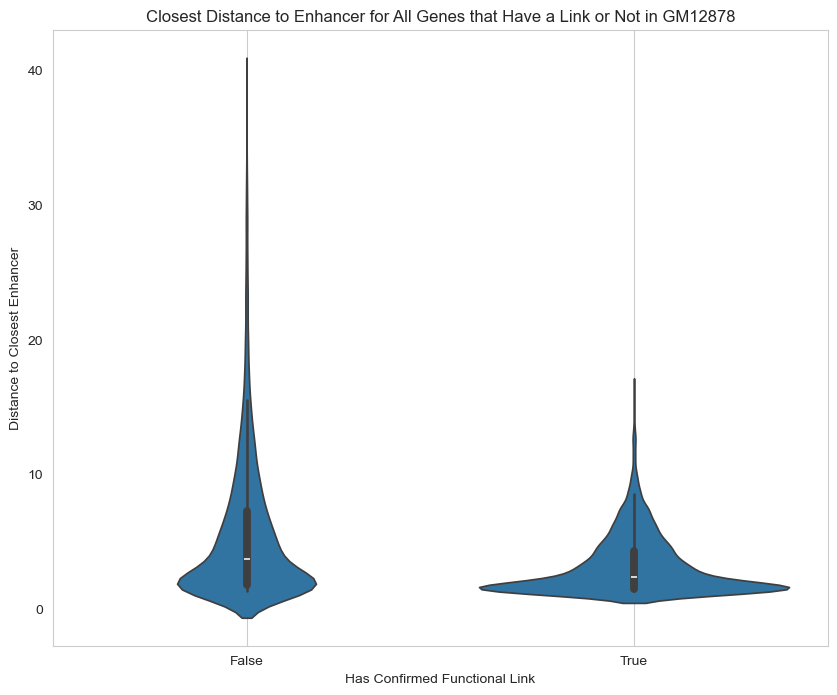

In [192]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
ax = sns.violinplot(data=gm12878_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")

# show mannwhitney U test
from scipy.stats import mannwhitneyu
has_link = gm12878_gene_to_closest_avg_enhancer_all[gm12878_gene_to_closest_avg_enhancer_all["has_link"] == True]["min_dist"]
no_link = gm12878_gene_to_closest_avg_enhancer_all[gm12878_gene_to_closest_avg_enhancer_all["has_link"] == False]["min_dist"]
stat, p = mannwhitneyu(has_link, no_link, alternative='two-sided')
print(f"U-statistic: {stat}, p-value: {p}")

# show the p value
# starbars.draw_annotation(
#     annotations=[('has_link', 'min_dist', p)],
#     ax=ax
# )

plt.xlabel("Has Confirmed Functional Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("Closest Distance to Enhancer for All Genes that Have a Link or Not in GM12878")
plt.grid()
plt.f
plt.show()

U-statistic: 4199314.5, p-value: 1.615056162416597e-80


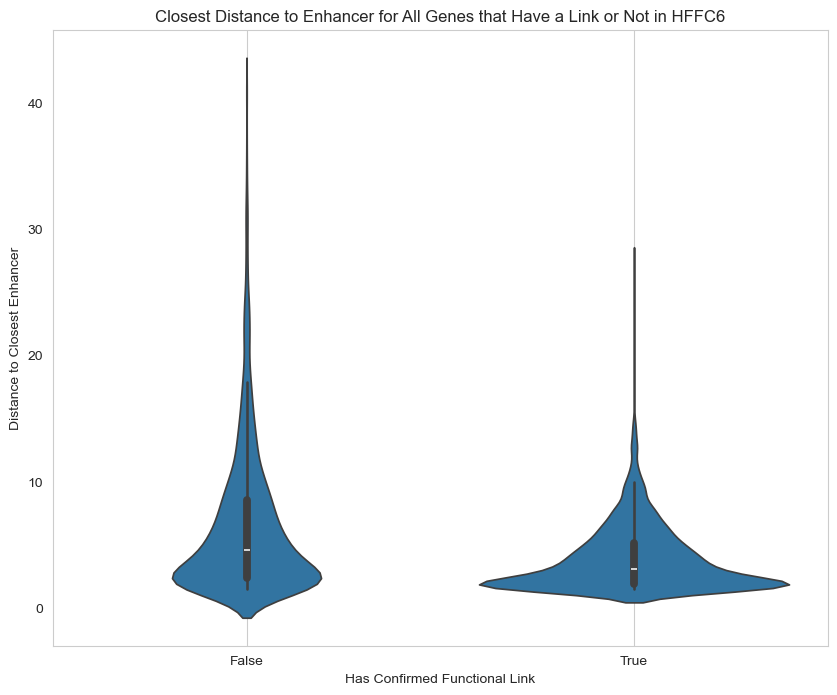

In [196]:
 # Box plot of the distance to the closest enhancer for all genes that have a link or not in HFFC6
plt.figure(figsize=(10, 8))
sns.violinplot(data=hffc6_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")

# show mannwhitney U test
from scipy.stats import mannwhitneyu
has_link = hffc6_gene_to_closest_avg_enhancer_all[hffc6_gene_to_closest_avg_enhancer_all["has_link"] == True]["min_dist"]
no_link = hffc6_gene_to_closest_avg_enhancer_all[hffc6_gene_to_closest_avg_enhancer_all["has_link"] == False]["min_dist"]
stat, p = mannwhitneyu(has_link, no_link, alternative='two-sided')
print(f"U-statistic: {stat}, p-value: {p}")

plt.xlabel("Has Confirmed Functional Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("Closest Distance to Enhancer for All Genes that Have a Link or Not in HFFC6")
plt.grid()
plt.savefig("figs/exp1_hffc.png", dpi=300, bbox_inches='tight')
plt.show()

U-statistic: 4465277.0, p-value: 2.1248881833616996e-65


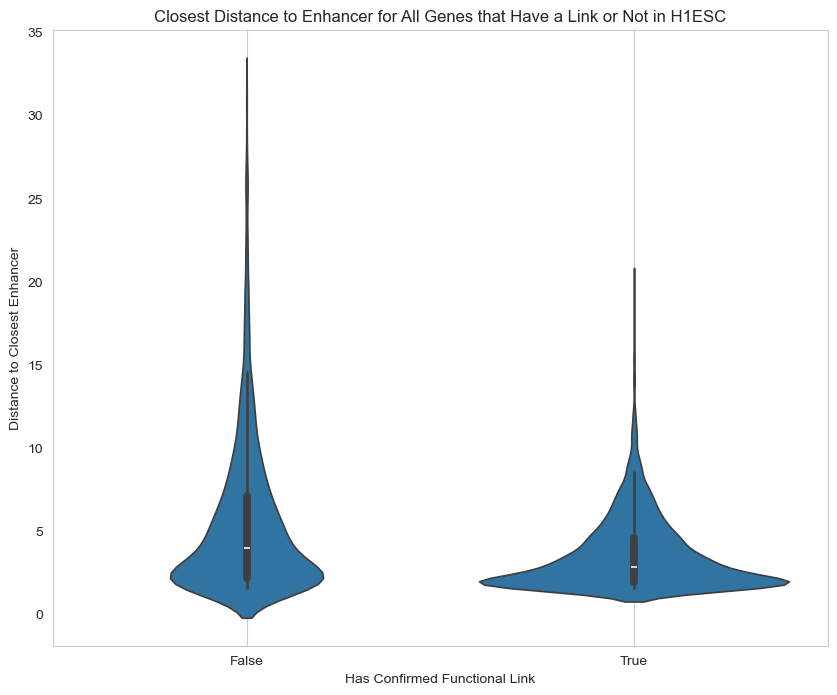

In [195]:
# Box plot of the distance to the closest enhancer for all genes that have a link or not in H1ESC
plt.figure(figsize=(10, 8))
sns.violinplot(data=h1esc_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")

# show mannwhitney U test
from scipy.stats import mannwhitneyu
has_link = h1esc_gene_to_closest_avg_enhancer_all[h1esc_gene_to_closest_avg_enhancer_all["has_link"] == True]["min_dist"]
no_link = h1esc_gene_to_closest_avg_enhancer_all[h1esc_gene_to_closest_avg_enhancer_all["has_link"] == False]["min_dist"]
stat, p = mannwhitneyu(has_link, no_link, alternative='two-sided')
print(f"U-statistic: {stat}, p-value: {p}")

plt.xlabel("Has Confirmed Functional Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("Closest Distance to Enhancer for All Genes that Have a Link or Not in H1ESC")
plt.grid()
plt.savefig("figs/exp1_h1.png", dpi=300, bbox_inches='tight')
plt.show()

U-statistic: 4557735.0, p-value: 1.4852613998710292e-80
2.0 0.03


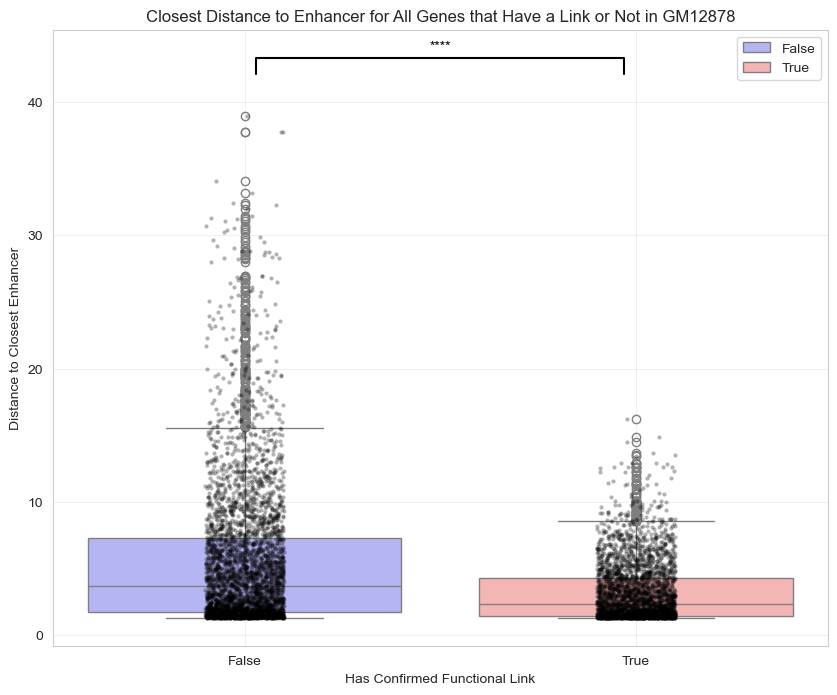

U-statistic: 4199314.5, p-value: 1.615056162416597e-80
2.0 0.03


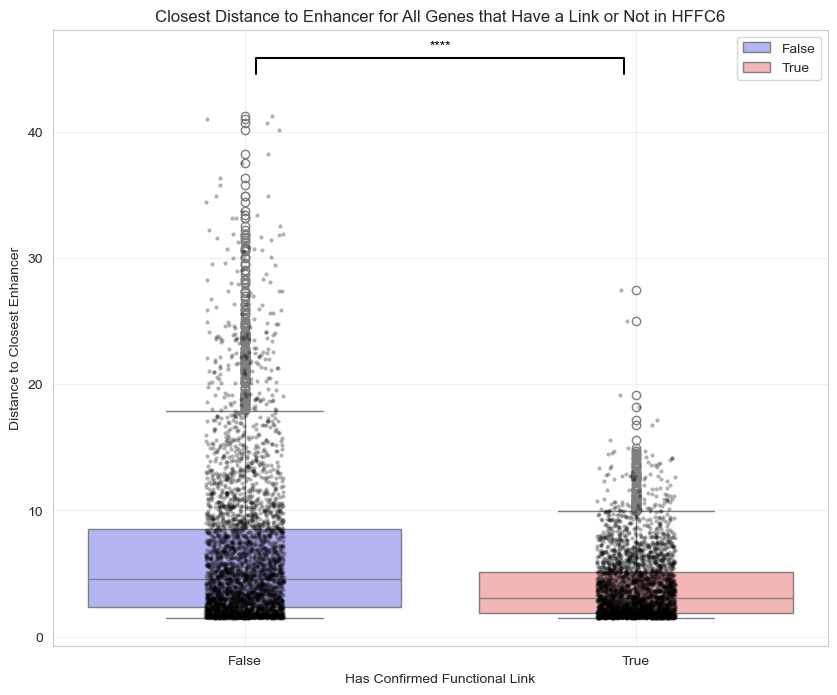

U-statistic: 4465277.0, p-value: 2.1248881833616996e-65
2.0 0.03


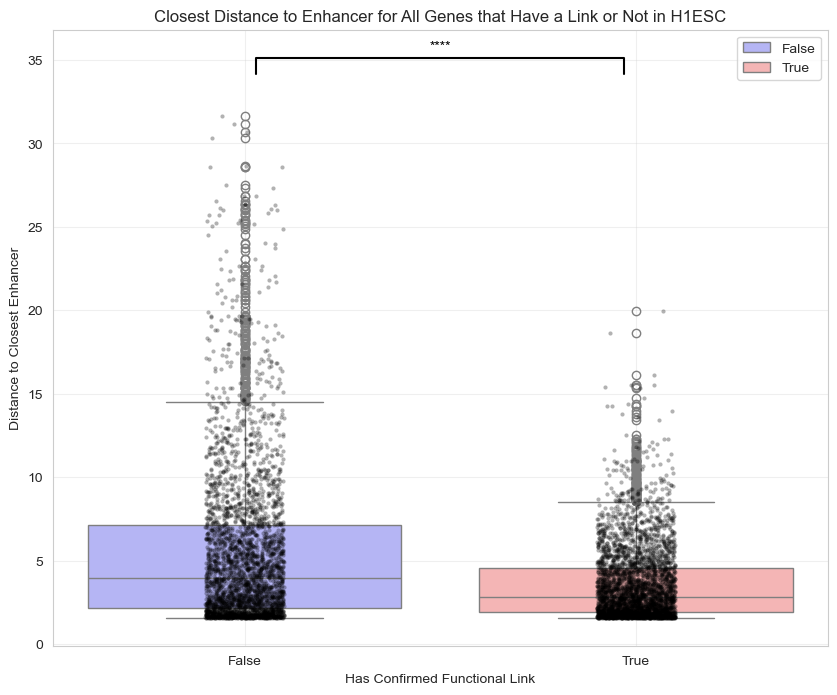

In [194]:

def plot_with_starbars(df, column, title, palette=None, plot_path=None):
    """
    Creates a boxplot with significance stars using starbars package.

    Args:
        df: DataFrame with 'has_link' column
        column: Column to plot (e.g. 'min_dist')
        title: Plot title
        palette: Optional color palette for the plot
    """
    plt.figure(figsize=(10, 8))

    # Create boxplot
    ax = sns.boxplot(
        data=df,
        x='has_link',
        y=column,
        palette=palette or ['#AAAAFF', '#FFAAAA'],
        hue='has_link'
    )

    # Add individual data points
    sns.stripplot(
        data=df,
        x='has_link',
        y=column,
        color='black',
        size=3,
        alpha=0.3,
        jitter=True
    )

    # Perform Mann-Whitney U test
    has_link = df[df["has_link"] == True][column]
    no_link = df[df["has_link"] == False][column]
    stat, p = mannwhitneyu(has_link, no_link, alternative='two-sided')
    print(f"U-statistic: {stat}, p-value: {p}")

    # Add significance stars using starbars
    annotations = [(False, True, p)]  # Compare False vs True
    starbars.draw_annotation(
        annotations=annotations,
        ax=ax
    )

    plt.title(title)
    plt.xlabel("Has Confirmed Functional Link")
    plt.ylabel("Distance to Closest Enhancer")
    plt.grid(alpha=0.3)
    if plot_path:
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')

    return plt

# Example usage for each cell line
plot_with_starbars(
    gm12878_gene_to_closest_avg_enhancer_all,
    "min_dist",
    "Closest Distance to Enhancer for All Genes that Have a Link or Not in GM12878",
    plot_path="figs/exp1_gm_star.png"
).show()

plot_with_starbars(
    hffc6_gene_to_closest_avg_enhancer_all,
    "min_dist",
    "Closest Distance to Enhancer for All Genes that Have a Link or Not in HFFC6",
    plot_path="figs/exp1_hffc_star.png"
).show()

plot_with_starbars(
    h1esc_gene_to_closest_avg_enhancer_all,
    "min_dist",
    "Closest Distance to Enhancer for All Genes that Have a Link or Not in H1ESC",
    plot_path="figs/exp1_h1_star.png"
).show()

In [170]:
gm12878_neanderthal_all_pairs_with_has_link = gm12878_neanderthal_df_ref.copy()
gm12878_neanderthal_all_pairs_with_has_link['has_link'] = (
    gm12878_neanderthal_all_pairs_with_has_link['gene_id'].isin(gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["has_link"] == True]['gene_id'].unique())
    & gm12878_neanderthal_all_pairs_with_has_link['enh_id'].isin(gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["has_link"] == True]['enh_id'].unique())
)

hffc6_neanderthal_all_pairs_with_has_link = hffc6_neanderthal_df_ref.copy()
hffc6_neanderthal_all_pairs_with_has_link['has_link'] = (
    hffc6_neanderthal_all_pairs_with_has_link['gene_id'].isin(hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["has_link"] == True]['gene_id'].unique())
    & hffc6_neanderthal_all_pairs_with_has_link['enh_id'].isin(hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["has_link"] == True]['enh_id'].unique())
)

h1esc_neanderthal_all_pairs_with_has_link = h1esc_neanderthal_df_ref.copy()
h1esc_neanderthal_all_pairs_with_has_link['has_link'] = (
    h1esc_neanderthal_all_pairs_with_has_link['gene_id'].isin(h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["has_link"] == True]['gene_id'].unique())
    & h1esc_neanderthal_all_pairs_with_has_link['enh_id'].isin(h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["has_link"] == True]['enh_id'].unique())
)

In [171]:
all_pairs_joined_hffc6_h1esc = (
    gm12878_neanderthal_all_pairs_with_has_link
    .merge(
        hffc6_neanderthal_all_pairs_with_has_link,
        on=["region_id", "gene_id", "enh_id"],
        suffixes=("_gm12878", "_hffc6"),
        how="inner"
    )
)

# region_id, gene_id, enh_id, gm12878_avg_dist, hffc6_avg_dist -> region_id, gene_id, enh_id, avg_dist, type (gm12878, hffc6)
# group by type and gene_id, and calculate the average distance
all_pairs_by_type_gm12878_yes_link_hffc6_no_link = (
    all_pairs_joined_hffc6_h1esc
    [
        (all_pairs_joined_hffc6_h1esc["has_link_gm12878"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == False)
        ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_hffc6"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

all_pairs_by_type_hffc6_yes_link_gm12878_no_link = (
    all_pairs_joined_hffc6_h1esc[
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_gm12878"] == False)
        ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_hffc6"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

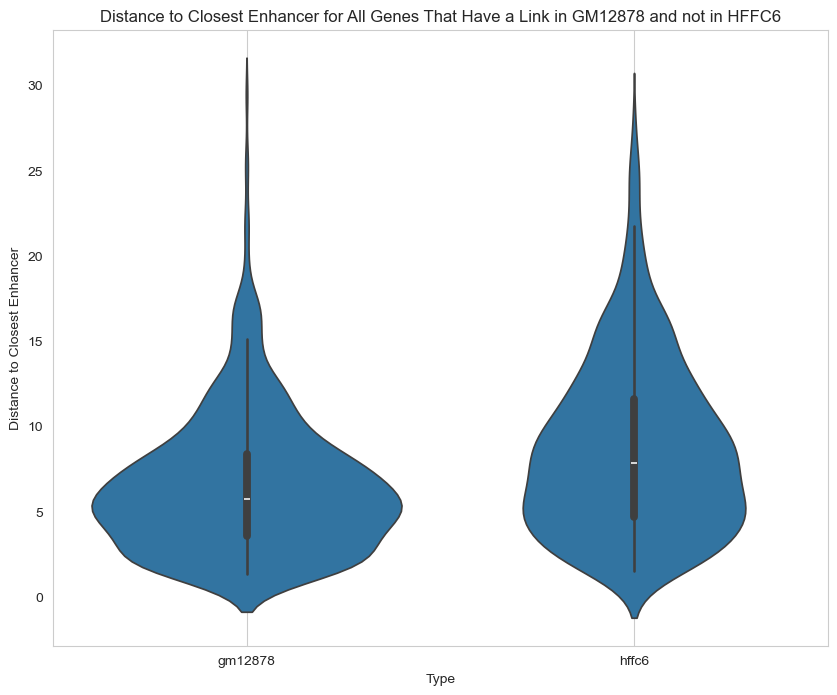

In [197]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
plt.figure(figsize=(10, 8))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_gm12878_yes_link_hffc6_no_link,
)

plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")

plt.title("Distance to Closest Enhancer for All Genes That Have a Link in GM12878 and not in HFFC6")
plt.grid()
plt.savefig("figs/exp2_gm_to_hffc_fwd_violin.png", dpi=300, bbox_inches='tight')
plt.show()

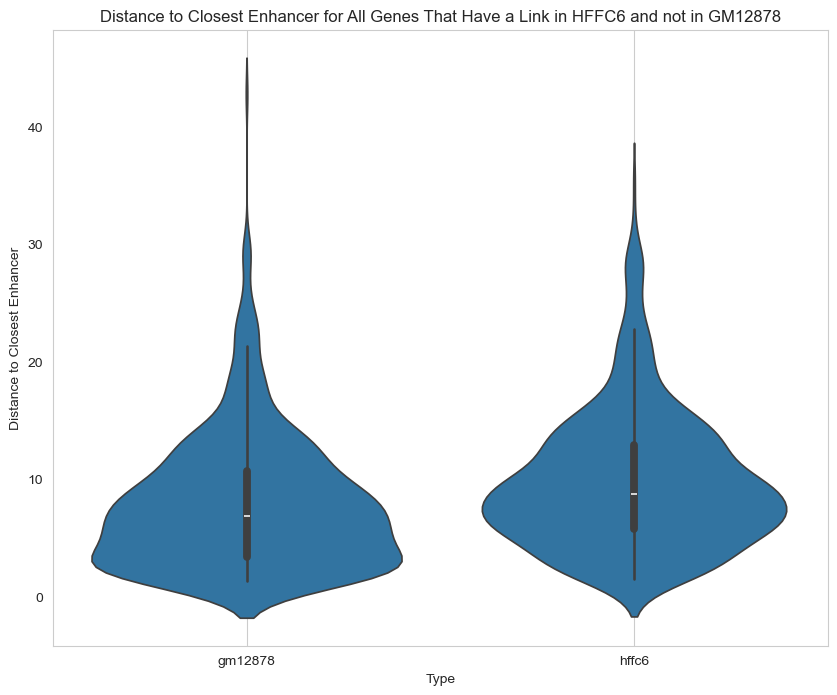

In [198]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
plt.figure(figsize=(10, 8))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_hffc6_yes_link_gm12878_no_link,
)
plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")

plt.title("Distance to Closest Enhancer for All Genes That Have a Link in HFFC6 and not in GM12878")
plt.grid()
plt.savefig("figs/exp2_gm_to_hffc_bck_violin.png", dpi=300, bbox_inches='tight')
plt.show()

In [174]:
all_pairs_joined_hffc6_h1esc = (
    hffc6_neanderthal_all_pairs_with_has_link
    .merge(
        h1esc_neanderthal_all_pairs_with_has_link,
        on=["region_id", "gene_id", "enh_id"],
        suffixes=("_hffc6", "_h1esc"),
        how="inner"
    )
)

# region_id, gene_id, enh_id, hffc6_avg_dist, h1esc_avg_dist -> region_id, gene_id, enh_id, avg_dist, type (hffc6, h1esc)
# group by type and gene_id, and calculate the average distance
all_pairs_by_type_hffc6_yes_link_h1esc_no_link = (
    all_pairs_joined_hffc6_h1esc
    [
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_h1esc"] == False)
    ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_hffc6", "avg_dist_h1esc"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

all_pairs_by_type_h1esc_yes_link_hffc6_no_link = (
    all_pairs_joined_hffc6_h1esc[
        (all_pairs_joined_hffc6_h1esc["has_link_h1esc"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == False)
    ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_hffc6", "avg_dist_h1esc"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

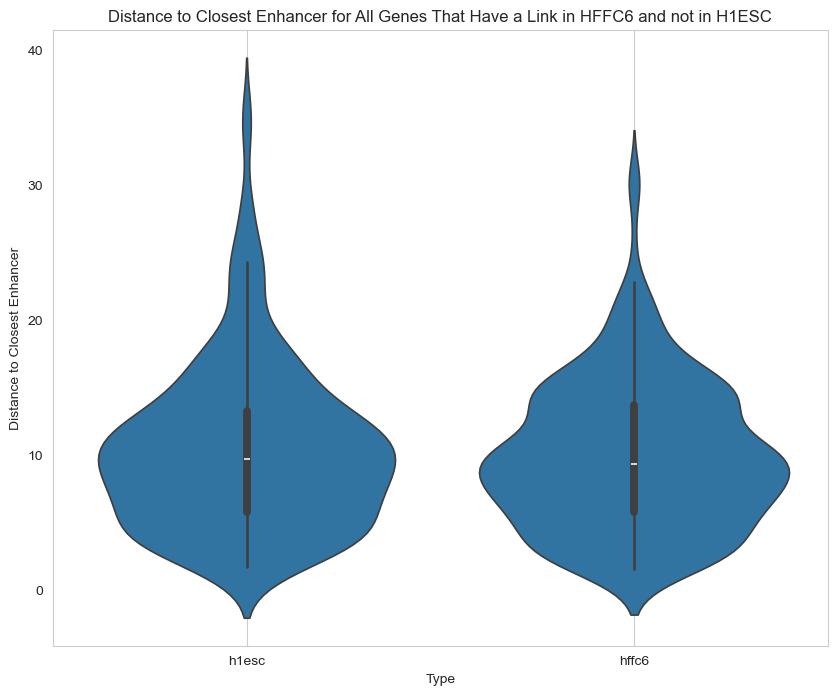

In [199]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in hffc6
plt.figure(figsize=(10, 8))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_hffc6_yes_link_h1esc_no_link,
)
plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")

plt.title("Distance to Closest Enhancer for All Genes That Have a Link in HFFC6 and not in H1ESC")
plt.grid()
plt.savefig("figs/exp2_hffc_to_h1_fwd_violin.png", dpi=300, bbox_inches='tight')
plt.show()

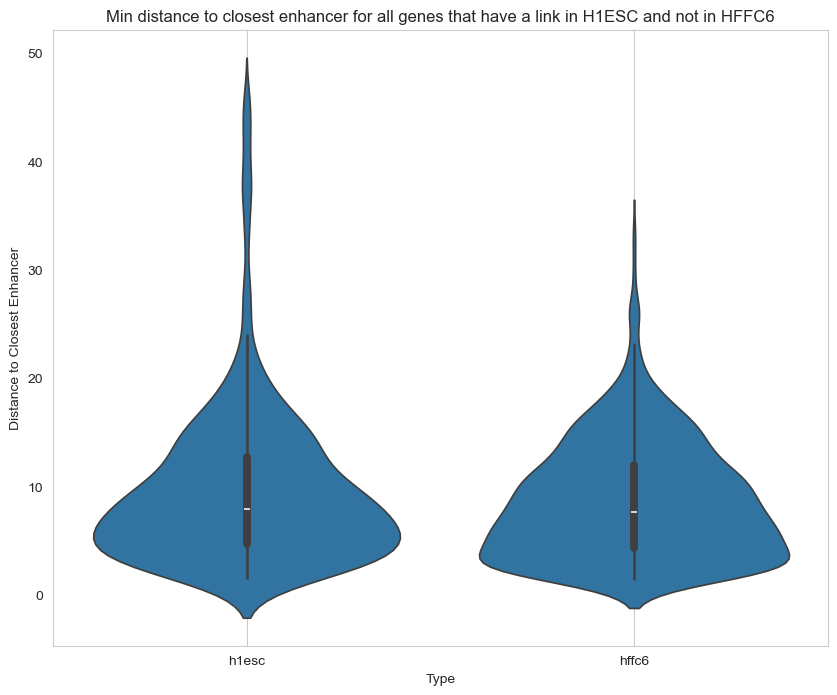

In [200]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in hffc6
plt.figure(figsize=(10, 8))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_h1esc_yes_link_hffc6_no_link,
)
plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")

plt.title("Min distance to closest enhancer for all genes that have a link in H1ESC and not in HFFC6")
plt.grid()
plt.savefig("figs/exp2_hffc_to_h1_bck_violin.png", dpi=300, bbox_inches='tight')
plt.show()

In [177]:
all_pairs_joined_gm12878_h1esc = (
    gm12878_neanderthal_all_pairs_with_has_link
    .merge(
        h1esc_neanderthal_all_pairs_with_has_link,
        on=["region_id", "gene_id", "enh_id"],
        suffixes=("_gm12878", "_h1esc"),
        how="inner"
    )
)

# region_id, gene_id, enh_id, gm12878_avg_dist, h1esc_avg_dist -> region_id, gene_id, enh_id, avg_dist, type (gm12878, h1esc)
# group by type and gene_id, and calculate the average distance
all_pairs_by_type_gm12878_yes_link_h1esc_no_link = (
    all_pairs_joined_gm12878_h1esc
    [
        (all_pairs_joined_gm12878_h1esc["has_link_gm12878"] == True) &
        (all_pairs_joined_gm12878_h1esc["has_link_h1esc"] == False)
    ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_h1esc"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

all_pairs_by_type_h1esc_yes_link_gm12878_no_link = (
    all_pairs_joined_gm12878_h1esc[
        (all_pairs_joined_gm12878_h1esc["has_link_h1esc"] == True) &
        (all_pairs_joined_gm12878_h1esc["has_link_gm12878"] == False)
    ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_h1esc"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

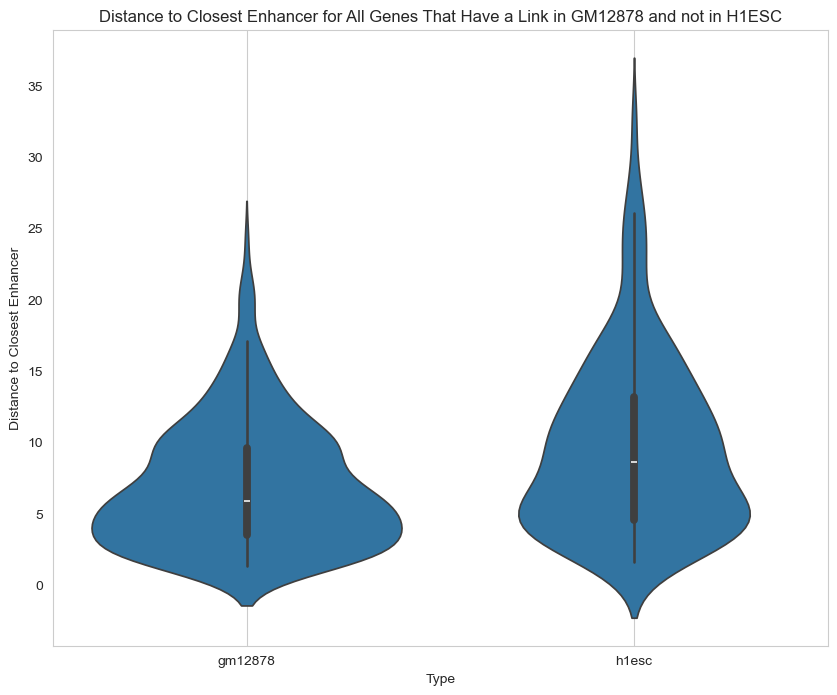

In [201]:
plt.figure(figsize=(10, 8))
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_gm12878_yes_link_h1esc_no_link,
)

plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")
plt.title("Distance to Closest Enhancer for All Genes That Have a Link in GM12878 and not in H1ESC")
plt.grid()
plt.savefig("figs/exp2_gm_to_h1_fwd_violin.png", dpi=300, bbox_inches='tight')
plt.show()

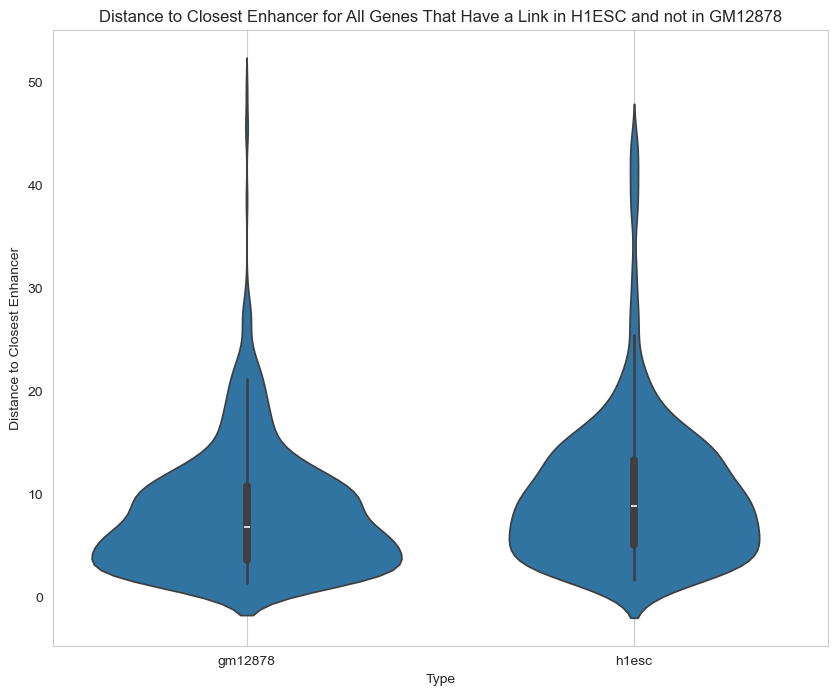

In [202]:
plt.figure(figsize=(10, 8))
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_h1esc_yes_link_gm12878_no_link,
)

plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")
plt.title("Distance to Closest Enhancer for All Genes That Have a Link in H1ESC and not in GM12878")
plt.grid()
plt.savefig("figs/exp2_gm_to_h1_bck_violin.png", dpi=300, bbox_inches='tight')
plt.show()

In [180]:
# 1. Add quartile-based category columns for each cell line
for df, name in [
    (gm12878_gene_to_closest_avg_enhancer_all, 'gm12878'),
    (hffc6_gene_to_closest_avg_enhancer_all, 'hffc6'),
    (h1esc_gene_to_closest_avg_enhancer_all, 'h1esc'),
]:
    q1 = df['min_dist'].quantile(0.33)
    q3 = df['min_dist'].quantile(0.66)
    def label_quartile(x):
        if x <= q1:
            return 'small'
        elif x <= q3:
            return 'mid'
        else:
            return 'large'
    df['quartile_cat'] = df['min_dist'].apply(label_quartile)

In [181]:
hffc6_gene_to_closest_avg_enhancer_all

,avg_dist,min_dist,max_dist,has_link,quartile_cat
gene_id,,,,,
ENSG00000106123,1.926510,1.926510,1.926510,False,small
ENSG00000136881,2.189550,2.189550,2.189550,False,small
ENSG00000136872,2.346342,2.346342,2.346342,False,small
ENSG00000257743,3.267527,3.267527,3.267527,False,mid
ENSG00000184698,3.420347,1.609941,7.708592,False,small
...,...,...,...,...,...
ENSG00000197532,40.829543,40.137157,42.516533,False,large
ENSG00000186440,41.445610,40.732639,43.253117,False,large
ENSG00000279111,41.740176,41.016712,43.618973,False,large


In [204]:
def plot_quartile_jumps_heatmap(jumps, title, y_label, x_label, plot_path=None):
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    from matplotlib.patches import Patch

    quartiles = ['small', 'mid', 'large']
    matrix = np.zeros((3, 3), dtype=int)

    # Fill the matrix with counts
    for i, src in enumerate(quartiles):
        for j, dst in enumerate(quartiles):
            matrix[i, j] = jumps.get((src, dst), 0)

    plt.figure(figsize=(6, 6))

    # Create base heatmap without annotations
    ax = sns.heatmap(matrix, annot=False, fmt='d', cmap="Blues",
                    xticklabels=quartiles, yticklabels=quartiles)

    # Colors for different transition types
    dark_red = 'darkred'      # small -> large (most dramatic increase)
    medium_red = '#FF5050'    # mid -> large (moderate increase)
    dark_green = 'darkgreen'  # large -> small (most dramatic decrease)
    medium_green = '#50A050'  # large -> mid (moderate decrease)

    # Draw special transitions with colored rectangles
    # The most dramatic transitions
    if matrix[0, 2] > 0:  # small -> large
        ax.add_patch(plt.Rectangle((2, 0), 1, 1, fill=True, color=dark_red, alpha=0.7))
        ax.text(2.5, 0.5, str(matrix[0, 2]), ha="center", va="center",
                color="white", fontweight='bold', fontsize=12)

    if matrix[2, 0] > 0:  # large -> small
        ax.add_patch(plt.Rectangle((0, 2), 1, 1, fill=True, color=dark_green, alpha=0.7))
        ax.text(0.5, 2.5, str(matrix[2, 0]), ha="center", va="center",
                color="white", fontweight='bold', fontsize=12)

    # Moderately important transitions
    if matrix[1, 2] > 0:  # mid -> large
        ax.add_patch(plt.Rectangle((2, 1), 1, 1, fill=True, color=medium_red, alpha=0.7))
        ax.text(2.5, 1.5, str(matrix[1, 2]), ha="center", va="center",
                color="white", fontweight='bold', fontsize=12)

    if matrix[2, 1] > 0:  # large -> mid
        ax.add_patch(plt.Rectangle((1, 2), 1, 1, fill=True, color=medium_green, alpha=0.7))
        ax.text(1.5, 2.5, str(matrix[2, 1]), ha="center", va="center",
                color="white", fontweight='bold', fontsize=12)

    # Add annotations for the remaining cells
    for i in range(3):
        for j in range(3):
            # Skip cells we've already handled
            if (i == 0 and j == 2) or (i == 2 and j == 0) or \
               (i == 1 and j == 2) or (i == 2 and j == 1):
                continue
            ax.text(j + 0.5, i + 0.5, str(matrix[i, j]), ha="center", va="center",
                   color="black" if matrix[i, j] < 10 else "white", fontsize=11)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Add legend with all transition types
    legend_elements = [
        Patch(facecolor=dark_red, alpha=0.7, label='Small → Large'),
        Patch(facecolor=medium_red, alpha=0.7, label='Mid → Large'),
        Patch(facecolor=dark_green, alpha=0.7, label='Large → Small'),
        Patch(facecolor=medium_green, alpha=0.7, label='Large → Mid'),
        Patch(facecolor='#b3cde3', label='Other transitions')
    ]
    plt.legend(handles=legend_elements, loc='upper center',
               bbox_to_anchor=(0.5, -0.15), ncol=3)

    if plot_path:
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    else:
        plt.tight_layout()
    return plt

<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/enhancer3D/lib/python3.13/site-packages/matplotlib/pyplot.py'>

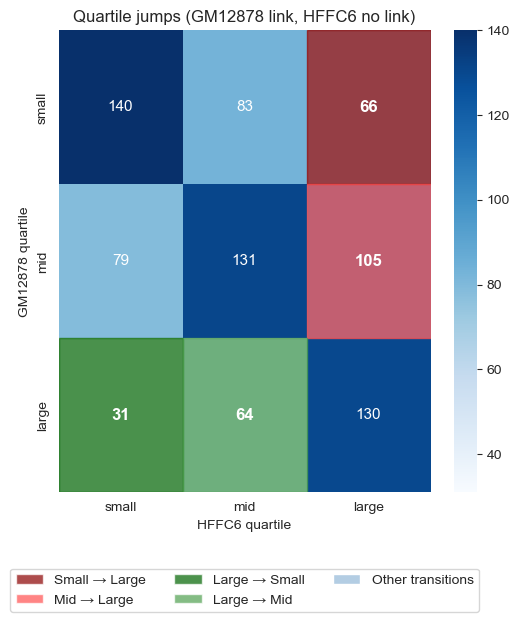

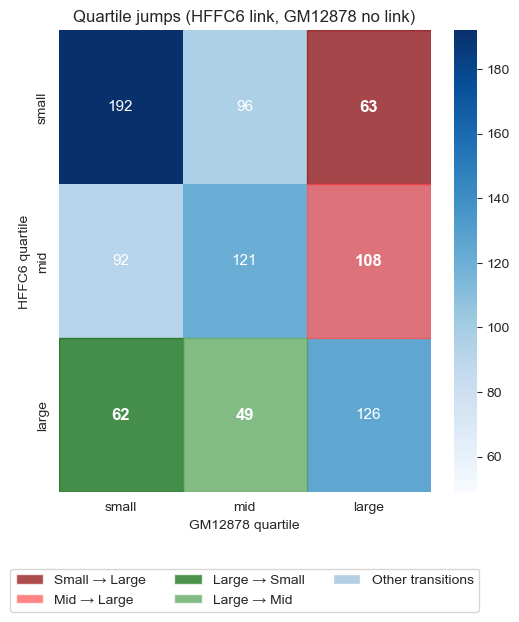

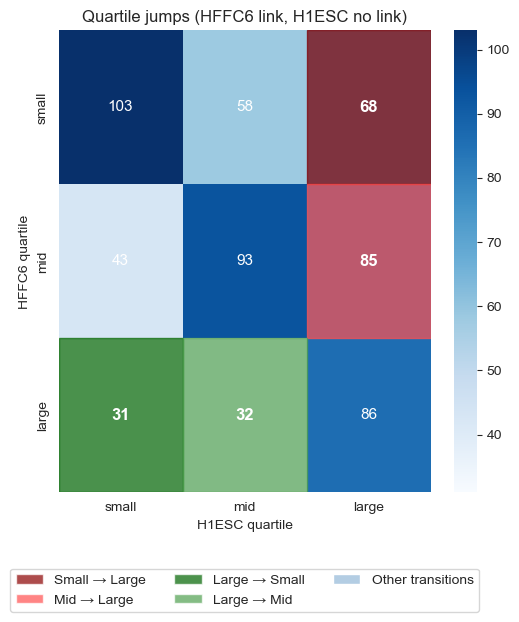

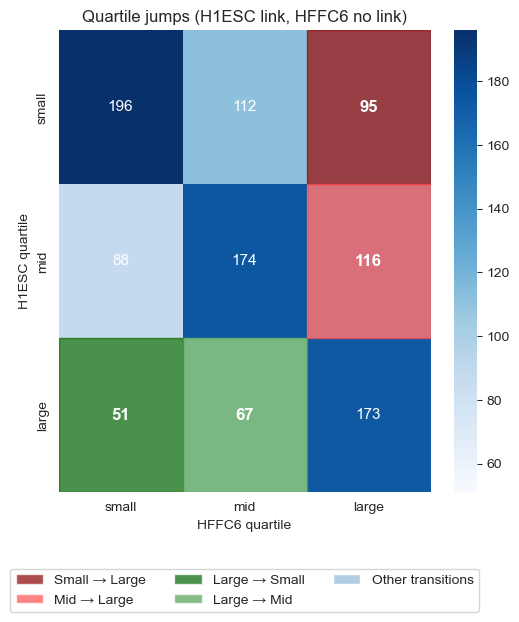

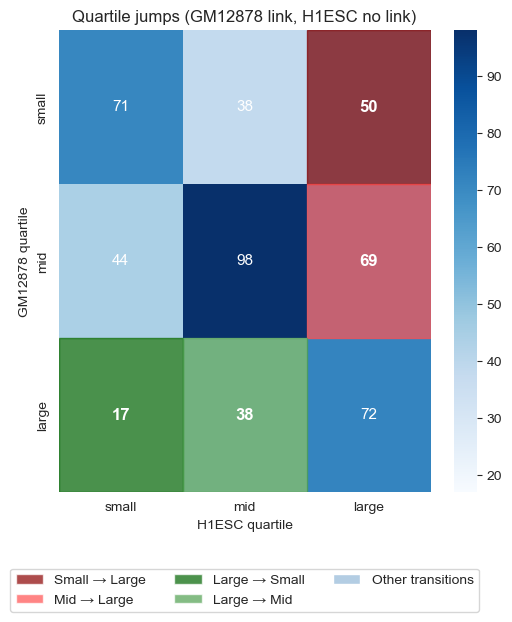

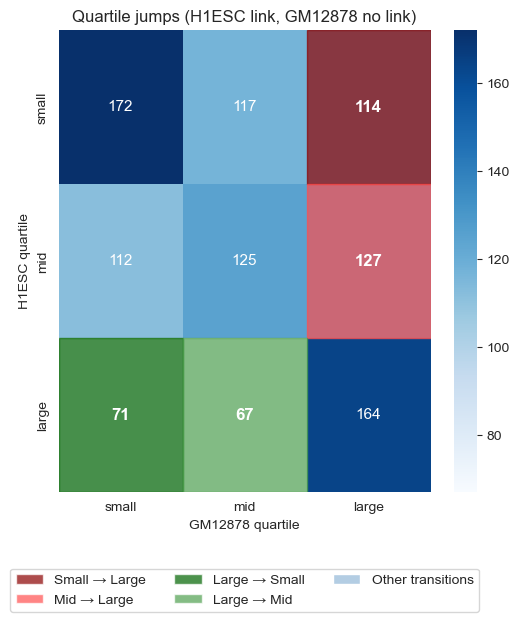

In [206]:
# 2. Compare quartile jumps for genes with link in one cell line but not the other
# Example: GM12878 vs HFFC6
merged_gm12878_hffc6 = gm12878_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']].merge(
    hffc6_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']],
    left_index=True, right_index=True, suffixes=('_gm12878', '_hffc6')
)
# Genes with link in GM12878 but not in HFFC6
jump_gm12878_link = merged_gm12878_hffc6[(merged_gm12878_hffc6['has_link_gm12878']) & (~merged_gm12878_hffc6['has_link_hffc6'])]
# Genes with link in HFFC6 but not in GM12878
jump_hffc6_link = merged_gm12878_hffc6[(merged_gm12878_hffc6['has_link_hffc6']) & (~merged_gm12878_hffc6['has_link_gm12878'])]

# Count quartile jumps
from collections import Counter
jumps_hffc6_no_link_to_gm12878_link = Counter(zip(jump_gm12878_link['quartile_cat_gm12878'], jump_gm12878_link['quartile_cat_hffc6']))
jumps_gm12878_no_link_to_hffc6_link = Counter(zip(jump_hffc6_link['quartile_cat_hffc6'], jump_hffc6_link['quartile_cat_gm12878']))


plot_quartile_jumps_heatmap(jumps_hffc6_no_link_to_gm12878_link, 'Quartile jumps (GM12878 link, HFFC6 no link)', 'GM12878 quartile', 'HFFC6 quartile', 'figs/exp2_gm_to_hffc_fwd_qjumps.png')
plot_quartile_jumps_heatmap(jumps_gm12878_no_link_to_hffc6_link, 'Quartile jumps (HFFC6 link, GM12878 no link)', 'HFFC6 quartile', 'GM12878 quartile', 'figs/exp2_gm_to_hffc_bck_qjumps.png')

# HFFC6 <-> H1ESC
merged_hffc6_h1esc = hffc6_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']].merge(
    h1esc_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']],
    left_index=True, right_index=True, suffixes=('_hffc6', '_h1esc')
)
jump_hffc6_link_h1esc = merged_hffc6_h1esc[(merged_hffc6_h1esc['has_link_hffc6']) & (~merged_hffc6_h1esc['has_link_h1esc'])]
jump_h1esc_link_hffc6 = merged_hffc6_h1esc[(merged_hffc6_h1esc['has_link_h1esc']) & (~merged_hffc6_h1esc['has_link_hffc6'])]
from collections import Counter
jumps_hffc6_h1esc = Counter(zip(jump_hffc6_link_h1esc['quartile_cat_hffc6'], jump_hffc6_link_h1esc['quartile_cat_h1esc']))
jumps_h1esc_hffc6 = Counter(zip(jump_h1esc_link_hffc6['quartile_cat_h1esc'], jump_h1esc_link_hffc6['quartile_cat_hffc6']))

plot_quartile_jumps_heatmap(jumps_hffc6_h1esc, 'Quartile jumps (HFFC6 link, H1ESC no link)', 'HFFC6 quartile', 'H1ESC quartile', 'figs/exp2_hffc_to_h1_fwd_qjumps.png')
plot_quartile_jumps_heatmap(jumps_h1esc_hffc6, 'Quartile jumps (H1ESC link, HFFC6 no link)', 'H1ESC quartile', 'HFFC6 quartile', 'figs/exp2_hffc_to_h1_bck_qjumps.png')

# GM12878 <-> H1ESC
merged_gm12878_h1esc = gm12878_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']].merge(
    h1esc_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']],
    left_index=True, right_index=True, suffixes=('_gm12878', '_h1esc')
)
jump_gm12878_link_h1esc = merged_gm12878_h1esc[(merged_gm12878_h1esc['has_link_gm12878']) & (~merged_gm12878_h1esc['has_link_h1esc'])]
jump_h1esc_link_gm12878 = merged_gm12878_h1esc[(merged_gm12878_h1esc['has_link_h1esc']) & (~merged_gm12878_h1esc['has_link_gm12878'])]
jumps_gm12878_h1esc = Counter(zip(jump_gm12878_link_h1esc['quartile_cat_gm12878'], jump_gm12878_link_h1esc['quartile_cat_h1esc']))
jumps_h1esc_gm12878 = Counter(zip(jump_h1esc_link_gm12878['quartile_cat_h1esc'], jump_h1esc_link_gm12878['quartile_cat_gm12878']))

plot_quartile_jumps_heatmap(jumps_gm12878_h1esc, 'Quartile jumps (GM12878 link, H1ESC no link)', 'GM12878 quartile', 'H1ESC quartile', 'figs/exp2_gm_to_h1_fwd_qjumps.png')
plot_quartile_jumps_heatmap(jumps_h1esc_gm12878, 'Quartile jumps (H1ESC link, GM12878 no link)', 'H1ESC quartile', 'GM12878 quartile', 'figs/exp2_gm_to_h1_bck_qjumps.png')

In [184]:
from gprofiler import GProfiler

gp = GProfiler(
    user_agent='enhancer3d', #optional user agent
    return_dataframe=True, #return pandas dataframe or plain python structures
)

def cell_line_1_small_has_link_cell_line_2_large_no_link(
    cell_line_1_gene_to_closest_avg_enhancer,
    cell_line_2_gene_to_closest_avg_enhancer,
    cell_line_1_name,
    cell_line_2_name
):
    """
    Finds genes that are small in cell line 1 and large in cell line 2, with a link in cell line 1 but not in cell line 2.
    """
    result = (
        cell_line_1_gene_to_closest_avg_enhancer
        .merge(
            cell_line_2_gene_to_closest_avg_enhancer,
            on="gene_id",
            suffixes=("_" + cell_line_1_name, "_" + cell_line_2_name)
        )
        .query(
            f"quartile_cat_{cell_line_1_name} == 'small' and quartile_cat_{cell_line_2_name} == 'large' and has_link_{cell_line_1_name} == True and has_link_{cell_line_2_name} == False"
        )
        .query(
            f"quartile_cat_{cell_line_1_name} == 'small' and quartile_cat_{cell_line_2_name} == 'large'"
        )
    )

    gene_names = (
        gp
        .convert(
            organism='hsapiens',
            query=result.index.unique().tolist()
        )
        [['converted', 'name']]
        .set_index('converted', drop=True)
    )

    result = result.merge(
        gene_names,
        left_index=True,
        right_index=True,
        how='inner'
    )

    return list(filter(lambda x: x != 'None', result['name'].tolist()))

In [185]:
print("GM12878 small has link, HFFC6 large no link:")
print("\n".join(
    cell_line_1_small_has_link_cell_line_2_large_no_link(
        gm12878_gene_to_closest_avg_enhancer_all,
        hffc6_gene_to_closest_avg_enhancer_all,
        'gm12878',
        'hffc6'
    )
))

GM12878 small has link, HFFC6 large no link:
KRT10
SMIM6
OTOP2
USH1G
CRIP3
C4BPB
NCOA3
AKAP8
ZSCAN32
HLA-DRA
FLVCR1
LGMN
ATP2A3
DENND1C
TRPV3
VAV1
APOBEC3H
GIMAP8
LRIF1
ADAMTSL2
PAX5
CD22
NUP210
HDAC11
ITGAL
ADA2
PNRC1
RNGTT
CCDC197
ADGRD2
IMMT
TMOD1
ZNF207
C17orf75
FAM111B
PIKFYVE
IDH1
FFAR2
ACOT2
PDHB
NUDT5
CDC123
CCDC74A
LGALS14
OR52H1
CD70
SUV39H2
CD1C
PKN2
RNASE1
ZNF83
KRBA1
TTYH1
CX3CL1
CYP1A1
SMIM15
CPD
ADGRB1
CERS4
NKX6-3
XPA
OR13A1
PIK3CB
ALOX5
CCDC166


In [186]:
print("HFFC6 small has link, GM12878 large no link:")
print("\n".join(
    cell_line_1_small_has_link_cell_line_2_large_no_link(
        hffc6_gene_to_closest_avg_enhancer_all,
        gm12878_gene_to_closest_avg_enhancer_all,
        'hffc6',
        'gm12878'
    )
))

HFFC6 small has link, GM12878 large no link:
PCDHA6
PCDHA5
PCDHA4
PCDHA3
KISS1
LPCAT2
NPIPB12
FAIM
SERPINH1
SPOCK1
NPIPB11
FRMPD1
COPB1
ACOT11
PRELP
C1QTNF9
COL5A1
SYT5
CA12
ARRDC1
RAP1GAP2
SPCS2
XRRA1
PARP4
SAXO2
SORBS3
FOSL2
SALL2
PSPC1
IGHMBP2
MRPL21
SLC2A10
TMEM14B
C1QTNF4
GRIP2
BTBD6
HTRA1
TFAP2C
ARRDC4
ADAMTS2
DHX9
KDM5B
BROX
PRXL2A
VEGFC
AIDA
TGFBR3
TBX4
PHETA1
LSM3
XPC
NPR3
FAM234B
GPRC5D
YBX3
GAS1
CLCA2
TSC22D1
GCKR
MFSD2B
CHMP1B
ADH1A


In [187]:
print("HFFC6 small has link, H1ESC large no link:")
print("\n".join(
    cell_line_1_small_has_link_cell_line_2_large_no_link(
        hffc6_gene_to_closest_avg_enhancer_all,
        h1esc_gene_to_closest_avg_enhancer_all,
        'hffc6',
        'h1esc'
    )
))

HFFC6 small has link, H1ESC large no link:
IFI16
RBM15
OTUD3
INPP5E
DNLZ
ZNF697
ARSG
IER3
NLE1
HNRNPA0
SPOCK1
CD14
HEBP2
COPB1
ANXA11
TLN2
USP3
API5
ZNF438
C1QTNF9
CA12
ARRDC1
SLC12A2
TMSB10
SPCS2
XRRA1
ADAM32
TTPAL
SGF29
ADAM9
TM2D2
SHB
SPATA6L
PLPP6
REV3L
CFAP69
HTRA1
PDPR
ARRDC4
YME1L1
SFRP1
UBAP1
STYK1
LYVE1
AP3S1
ATG12
PRXL2A
TBX4
STK4
NAV3
PHETA1
NPR3
RNF44
TAF2
CCDC121
YBX3
METAP1
ALDH2
CLCA2
RPS27AP5
KLHL42
MFSD2B
FIGNL1
GTF2H1
HPS5
STK24


In [188]:
print("H1ESC small has link, HFFC6 large no link:")
print("\n".join(
    cell_line_1_small_has_link_cell_line_2_large_no_link(
        h1esc_gene_to_closest_avg_enhancer_all,
        hffc6_gene_to_closest_avg_enhancer_all,
        'h1esc',
        'hffc6'
    )
))

H1ESC small has link, HFFC6 large no link:
FOXA3
HPCAL4
SMIM6
NEFM
OTOP2
USH1G
SMPDL3B
NOVA2
NUP210
MYMK
NCCRP1
SYNE4
PCDHB15
ALKBH6
MEIOB
DENND1C
ADGRG3
SETX
VAV1
ADAMTSL2
ETNK2
CRIP3
DNMT3L
GAST
IFT80
BPIFB2
TEFM
ADAP2
WDR49
RNASE6
NR2E1
OSTM1
OXER1
KRT79
MT1F
OPA1
CDON
PCDH8
TYMS
FAM209B
GCNT7
GABRD
ALOX15
ADRB3
SPATA22
PPP1R27
CDC123
NUDT5
ACTR3C
KRBA1
RARRES2
MAJIN
OVOL3
POTEF
TNFSF14
MRGPRD
ADGRE2
GPRIN2
CLC
CACNG8
TTYH1
SPMIP8
CEP295
RAB6C
CNGB1
ALDH3A2
SRP72
HCN4
ZNF22
ARL9
MAG
CST1
CPD
CASP14
CCDC33
CCDC74A
SLC2A14
MACROH2A2
ZNF562
RNGTT
RASAL3
CECR2
LSR
ACAP2
OMG
MROH2A
PHF21B
IFNL1
KDR
ZNF713
CRACD
HHIPL2
CRYGB
SYNDIG1


In [189]:
print("GM12878 small has link, H1ESC large no link:")
print("\n".join(
    cell_line_1_small_has_link_cell_line_2_large_no_link(
        gm12878_gene_to_closest_avg_enhancer_all,
        h1esc_gene_to_closest_avg_enhancer_all,
        'gm12878',
        'h1esc'
    )
))

GM12878 small has link, H1ESC large no link:
FCMR
CD55
IFI16
ADGRE3
MGP
HLA-DRA
CD14
LGMN
HLA-F
CDCA2
IER3
TNF
KCTD9
HEBP2
MPEG1
PLPP6
RUVBL1
HERC1
NCF2
TMEM14C
CCDC197
FFAR2
TRIM34
TMEM156
ARHGDIB
OR52H1
SUV39H2
CDNF
DCLRE1C
CD1C
PKN2
KLHL5
PCYT1A
TRIM22
STK4
BRIX1
EPB42
TOMM34
SMIM15
STK17B
SGF29
MISFA
UEVLD
IRS1
GTF2H1
HPS5
STK24
OR13A1
ALOX5
TUT7


In [190]:
print("H1ESC small has link, GM12878 large no link:")
print("\n".join(
    cell_line_1_small_has_link_cell_line_2_large_no_link(
        h1esc_gene_to_closest_avg_enhancer_all,
        gm12878_gene_to_closest_avg_enhancer_all,
        'h1esc',
        'gm12878'
    )
))

H1ESC small has link, GM12878 large no link:
LGALS12
P2RX3
PGLYRP1
PPIE
HPCAL4
JPH4
NEFM
JAG2
PCDHA13
PCDHGA1
NOVA2
SULT1A4
NPIPB12
BOLA2-SMG1P6
SLX1B
BOLA2
PCDHA1
PCDHA4
PCDHA12
NPIPB11
PCDHB15
PCDHGA2
PCDHA6
PCDHA11
ZBTB25
PCDHA8
SORBS3
CLIP3
ADGRG3
ETNK2
CIMAP2
ACOT11
TEFM
ADAP2
WDR49
FOXRED1
SRPRA
RNASE6
NR2E1
OSTM1
ZNF496
FAM118B
RPUSD4
PRR5
FGF19
TIRAP
CDON
ACRV1
PCDH8
HAUS2
LRRC57
NDC1
PKNOX2
TFAP2C
PDE9A
ZNF506
HRH3
TAF4
SPATA22
SALL2
ZNF253
SDC4
PRSS41
ACTR3C
ALMS1
ZNF354B
ZNF835
ZNF454
MRGPRD
SYT5
GRM6
ASIC3
SOX13
CACNG8
SH3BGR
ZNF583
UTF1
RAB6C
CNGB1
GPRC5D
LCA5L
SRP72
HCN4
FAM234B
ZNF22
ARL9
LEPROTL1
CST1
IARS2
CYP4V2
PAX6
MACROH2A2
ILVBL
ZNF562
TVP23C
TVP23C-CDRT4
RASAL3
TSC22D1
ZNF766
CECR2
NOTCH3
MROH2A
PHF21B
IFNL1
KDR
MAP2K3
CRACD
CRYGB
RBIS
RALYL
ZSCAN4
ZNF749
ZNF550
ZNF549
